## The purpose of this MVP is to show Basic Data cleaning and visualization

## The data that we will be working with regard sales of a store to try to predict the sales, but in this MVP we want to understand the customer behavior>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv(r'C:\Users\dalsa\Desktop\T5 bootcamp\Train-Set.csv')
df_train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_test = pd.read_csv(r'C:\Users\dalsa\Desktop\T5 bootcamp\Test-Set.csv')
df_test.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### As can be seen above, the data has already been seperated before to test and train from the source. Since the purpose of this MVP to analyse the data we will use the train data to understand the customer behavior.


In [4]:
df = df_train
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



### Let's first understand the coloumns of this dataframe .

#### ProductID : unique product ID
#### Weight : weight of products
#### FatContent : specifies whether the product is low on fat or not
#### Visibility : percentage of total display area of all products in a store allocated to the particular product
#### ProductType : the category to which the product belongs
#### MRP : Maximum Retail Price (listed price) of the products
#### OutletID : unique store ID
#### EstablishmentYear : year of establishment of the outlets
#### OutletSize : the size of the store in terms of ground area covered
#### LocationType : the type of city in which the store is located
#### OutletType : specifies whether the outlet is just a grocery store or some sort of supermarket
#### OutletSales : (target variable) sales of the product in the particular store
####

In [5]:
# data cleaning

In [6]:
df.isna().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

## there are many NaN values to deal with in two columns, let's first deal with the weight column

In [7]:
df.shape

(8523, 12)

In [8]:
df['Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Weight, Length: 8523, dtype: float64

### since the the products ID are unique we can use them to fill the item weight. for example: if a two products has the same id they should have the same weight, willl do this in the final presentation.
### for this MVP will do a quick average fill.

In [9]:
import math

In [10]:
# just to check, will do quick for loop to test, counter should equal 1463 
#counter = 0
#for x in range(len(df['Weight'])):
 #   if  math.isnan(df['Weight'][x]):
  #      counter +=1
# counter

In [11]:
# for x in range(len(df['Weight'])):
#     if  math.isnan(df['Weight'][x]):
#         df['Weight'][x] = df['ProductID'][x] 
        

In [12]:
# will use the same approach to fill the outlet size
# for x in range(len(df['OutletSize'])):
#     if type(df['OutletSize'][x]) is float:
#         if  math.isnan(df['OutletSize'][x]):
#             df['OutletSize'][x] = df['OutletID'][x]

In [13]:
# fill weight with mean

df['Weight']=df['Weight'].replace(math.nan,df['Weight'].mean())


In [14]:
# fill outlet size with the mode

df.fillna(df['OutletSize'].mode()[0], inplace=True)
df.isna().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [15]:
df.duplicated().sum()

0

### initial data cleaning is done, let's do visualization to understand the customer behavior and how can the stores improve

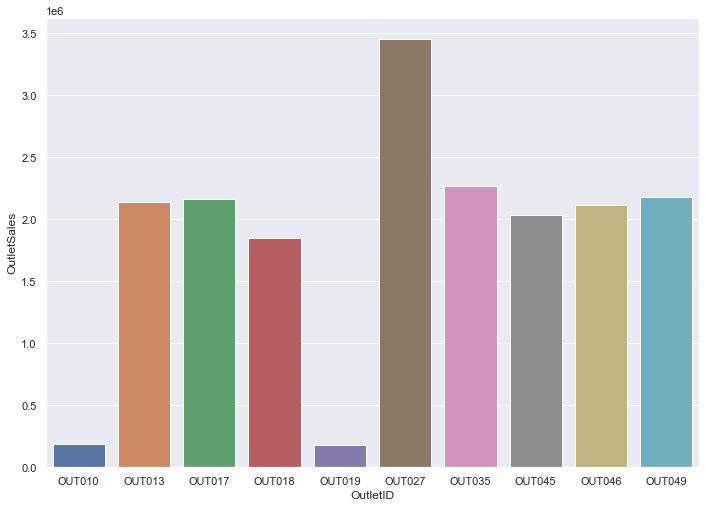

In [16]:
# will start by seeing which store had the most sales, from the outlet ID column
sns.set(rc={'figure.figsize':(11.7,8.27)})
outlet_id_df = outlet_id_df = df.groupby(['OutletID','OutletSize']).sum()
outlet_id_df.reset_index(inplace=True)
sns.barplot(x='OutletID', y='OutletSales', data=outlet_id_df);

### from the figure it is clear OUT027 had the most sales, but the stores are different sized.
### Lets see how the outlet size make a difference


<AxesSubplot:xlabel='OutletID', ylabel='OutletSales'>

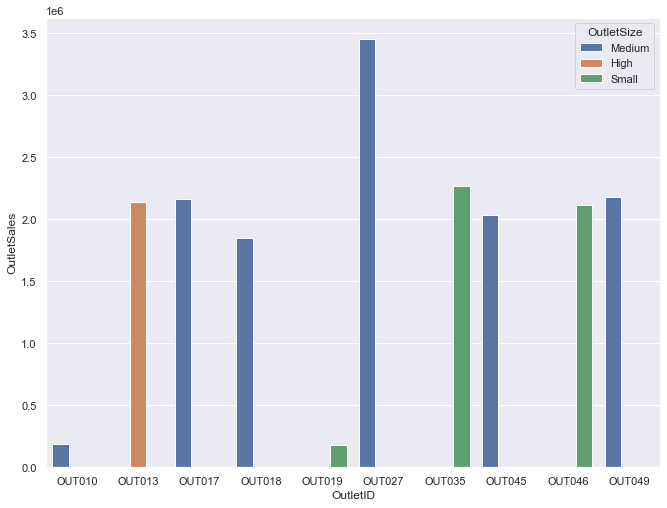

In [17]:
sns.set(rc={'figure.figsize':(11,8.27)})

sns.barplot(x='OutletID', y='OutletSales', data=outlet_id_df,hue='OutletSize')

## we can see here that OUT027  is meaduim size store yet it had more sales than OUT013 which is large store.
## yet this result can be explained since we filled null values with the mode, better filling of the data can show something different 
## lets assume this is the case and try to understand why this store has more sales than other.
## big questions like : 

### - Does the Establishment Year matter ? 
### - Does this store has more low/high fat products than others ?
### - Location type?

In [18]:
outlet_id_df = outlet_id_df = df.groupby(['OutletID','OutletSize','LocationType','FatContent','EstablishmentYear']).sum()
outlet_id_df.reset_index(inplace=True)
outlet_id_df

,OutletID,OutletSize,LocationType,FatContent,EstablishmentYear,Weight,ProductVisibility,MRP,OutletSales
0,OUT010,Medium,Tier 3,LF,1998,304.360000,2.699469,3746.7276,9.015598e+03
1,OUT010,Medium,Tier 3,Low Fat,1998,4245.680000,32.128716,47411.1132,1.144244e+05
2,OUT010,Medium,Tier 3,Regular,1998,2455.930000,20.137207,25093.6942,6.092603e+04
3,OUT010,Medium,Tier 3,low fat,1998,55.890000,0.554434,627.9888,1.227069e+03
4,OUT010,Medium,Tier 3,reg,1998,104.940000,0.789007,1252.0408,2.747091e+03
5,OUT013,High,Tier 3,LF,1987,443.170000,1.453065,4453.4388,6.456462e+04
6,OUT013,High,Tier 3,Low Fat,1987,7369.695000,32.467625,79513.5096,1.298985e+06
7,OUT013,High,Tier 3,Regular,1987,3926.360000,19.836763,43855.6490,7.083872e+05
8,OUT013,High,Tier 3,low fat,1987,218.335000,1.307211,2435.1964,4.645087e+04
9,OUT013,High,Tier 3,reg,1987,164.170000,0.815196,1551.2218,2.427573e+04


<AxesSubplot:xlabel='OutletID', ylabel='OutletSales'>

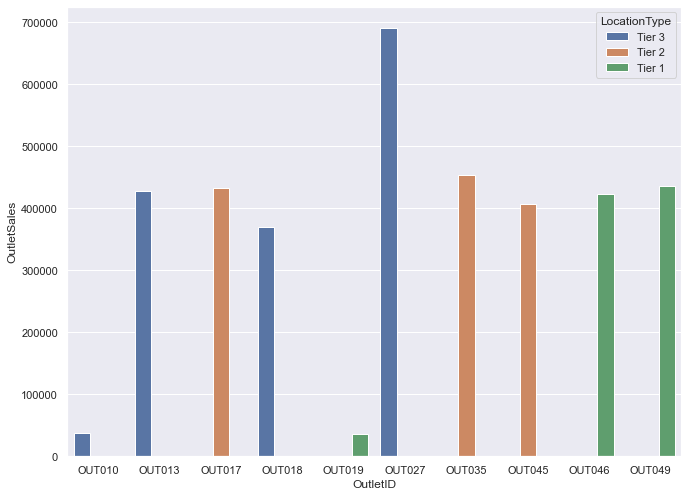

In [19]:
sns.barplot(x='OutletID', y='OutletSales', data=outlet_id_df,hue='LocationType',ci= None)

<AxesSubplot:xlabel='OutletID', ylabel='OutletSales'>

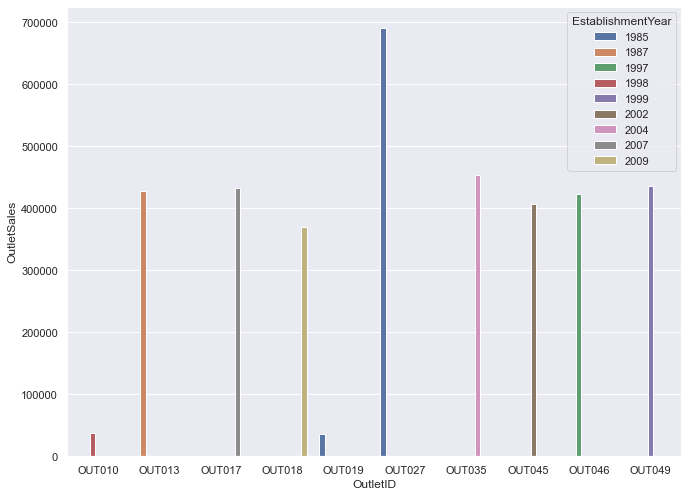

In [20]:
sns.barplot(x='OutletID', y='OutletSales', data=outlet_id_df,ci= None,hue='EstablishmentYear')

### Olders outlet has the biggest sales, but that doesn't mean old is more famous and better.
### other relatively new outlets are doing better than other older outlets.

### we are done with the visualization for now, in the final submission will do better data cleaning and compare how the visualztion differ

In [21]:
df

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### what we want to predict is the sales of each item in different outlets.
### product ID will be dropped since it don't help the algorithtim, and convert OUTletID to dummy



In [22]:
df.drop('ProductID',inplace=True,axis=1)
df.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df = pd.get_dummies(df)
df.head()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales,FatContent_LF,FatContent_Low Fat,FatContent_Regular,FatContent_low fat,FatContent_reg,...,OutletSize_High,OutletSize_Medium,OutletSize_Small,LocationType_Tier 1,LocationType_Tier 2,LocationType_Tier 3,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [24]:
df

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales,FatContent_LF,FatContent_Low Fat,FatContent_Regular,FatContent_low fat,FatContent_reg,...,OutletSize_High,OutletSize_Medium,OutletSize_Small,LocationType_Tier 1,LocationType_Tier 2,LocationType_Tier 3,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [25]:
from sklearn import metrics


In [26]:
from sklearn.model_selection import train_test_split
x = df.drop('OutletSales',axis=1)
y = df['OutletSales']

x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [28]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)


In [29]:
x_train_scale

array([[ 0.00452494, -1.28675376, -0.82791215, ..., -1.35895699,
        -0.34707369,  2.806707  ],
       [ 0.10905466,  0.10692341, -1.24743948, ...,  0.73585846,
        -0.34707369, -0.35628942],
       [ 0.53439985, -0.27162588,  1.63104945, ...,  0.73585846,
        -0.34707369, -0.35628942],
       ...,
       [-1.63486063, -0.91225904, -1.47490569, ...,  0.73585846,
        -0.34707369, -0.35628942],
       [-1.02283616, -0.97379703,  0.87568216, ...,  0.73585846,
        -0.34707369, -0.35628942],
       [-1.0015689 , -0.65417127,  0.03004618, ...,  0.73585846,
        -0.34707369, -0.35628942]])

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x_train_scale, y_train)
print(lin_model.score(x_test_scale,y_test))

0.5607926800835055
